In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
pip install sklearn

In [4]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [5]:
air_data.head()

Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]

In [6]:
air_data.shape

(9357, 15)

In [7]:
air_data.dropna(axis=0, how='all')

Date      Time  CO(GT)  ...       T         RH        AH
0    2004-03-10  18:00:00     2.6  ...  13.600  48.875001  0.757754
1    2004-03-10  19:00:00     2.0  ...  13.300  47.700000  0.725487
2    2004-03-10  20:00:00     2.2  ...  11.900  53.975000  0.750239
3    2004-03-10  21:00:00     2.2  ...  11.000  60.000000  0.786713
4    2004-03-10  22:00:00     1.6  ...  11.150  59.575001  0.788794
...         ...       ...     ...  ...     ...        ...       ...
9352 2005-04-04  10:00:00     3.1  ...  21.850  29.250000  0.756824
9353 2005-04-04  11:00:00     2.4  ...  24.325  23.725000  0.711864
9354 2005-04-04  12:00:00     2.4  ...  26.900  18.350000  0.640649
9355 2005-04-04  13:00:00     2.1  ...  28.325  13.550000  0.513866
9356 2005-04-04  14:00:00     2.2  ...  28.500  13.125000  0.502804

[9357 rows x 15 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


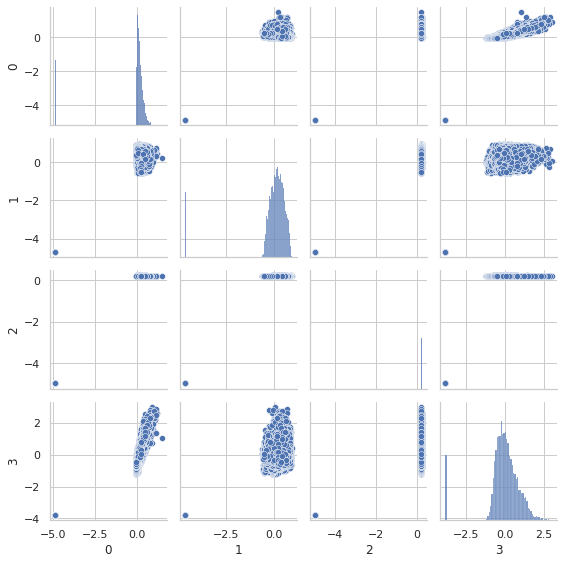

In [8]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']

data_to_plot = air_data[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

In [9]:
air_data.dropna(axis=0, how='all')

Date      Time  CO(GT)  ...       T         RH        AH
0    2004-03-10  18:00:00     2.6  ...  13.600  48.875001  0.757754
1    2004-03-10  19:00:00     2.0  ...  13.300  47.700000  0.725487
2    2004-03-10  20:00:00     2.2  ...  11.900  53.975000  0.750239
3    2004-03-10  21:00:00     2.2  ...  11.000  60.000000  0.786713
4    2004-03-10  22:00:00     1.6  ...  11.150  59.575001  0.788794
...         ...       ...     ...  ...     ...        ...       ...
9352 2005-04-04  10:00:00     3.1  ...  21.850  29.250000  0.756824
9353 2005-04-04  11:00:00     2.4  ...  24.325  23.725000  0.711864
9354 2005-04-04  12:00:00     2.4  ...  26.900  18.350000  0.640649
9355 2005-04-04  13:00:00     2.1  ...  28.325  13.550000  0.513866
9356 2005-04-04  14:00:00     2.2  ...  28.500  13.125000  0.502804

[9357 rows x 15 columns]

In [10]:
features = air_data

In [11]:
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)

In [12]:
labels = air_data['C6H6(GT)'].values

In [13]:
features = features.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [18]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (6549, 11)
y_train shape --> (6549,)
X_test shape --> (2808, 11)
y_test shape --> (2808,)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("Predicted values:", regressor.predict(X_test))

Predicted values: [15.77399445 21.51568469  2.20190385 ...  9.41510587  1.47566846
  5.56265214]


In [22]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9991400904012937


In [23]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR


In [24]:
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999984206243899


In [26]:
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999959536407913


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [30]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999678234857314


In [31]:
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [33]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[8.75168595e-05 8.91415307e-02 2.87646926e-06 1.01694474e-01
 3.69879914e-04 2.76249684e-02 5.09304593e-05 3.71594878e-02
 2.13476374e-01 2.10233366e-01 3.20158596e-01]


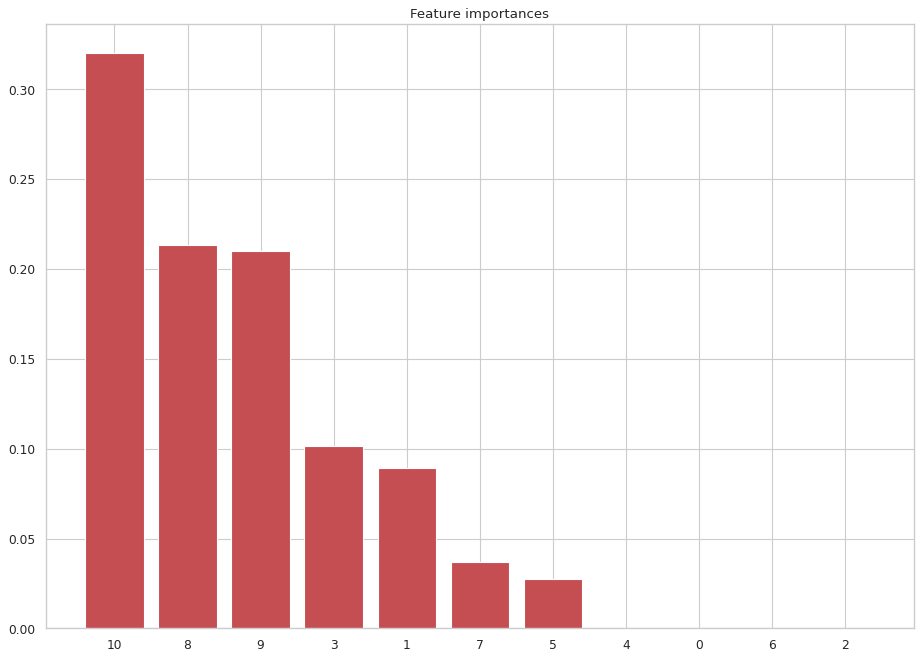

In [34]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()